In [1]:
from oggm import cfg, workflow, utils, shop
import pandas as pd
import os, glob
import numpy as np
from scipy import stats
import xarray as xr
import matplotlib.pyplot as plt
import progressbar

In [2]:
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
gcms = pd.read_csv('/home/www/oggm/cmip6/all_gcm_list.csv', index_col=0)
gcms = list(gcms.gcm.unique())
gcms

['CESM2-WACCM',
 'MPI-ESM1-2-HR',
 'GFDL-ESM4',
 'NorESM2-MM',
 'INM-CM4-8',
 'INM-CM5-0',
 'MRI-ESM2-0',
 'CESM2',
 'EC-Earth3',
 'EC-Earth3-Veg',
 'CAMS-CSM1-0',
 'BCC-CSM2-MR',
 'FGOALS-f3-L',
 'TaiESM1',
 'CMCC-CM2-SR5']

In [4]:
idir = 'era5_eb_nocalv/cmip6_output/'

In [5]:
failed = set()
failed_short = set()
fdf = pd.DataFrame()
for rgi_reg in range(1, 20):
    rgi_reg = '{:02d}'.format(rgi_reg)
    print(rgi_reg)
    rdir = idir + 'RGI' + rgi_reg + '/'
    all_ncs = glob.glob(rdir + '*/*.nc')
    for nc in sorted(all_ncs):
        ssp = os.path.basename(nc).split('_')[1].replace('.nc', '')
        gcm = os.path.basename(nc).split('_')[0]
        key_both = ssp + '_' + gcm
        with xr.open_dataset(nc) as ds:
            this_failed = ds.rgi_id[ds.volume.isel(time=-1).isnull()].data
            fdf = fdf.append({'rgi_reg':rgi_reg, 'ssp':ssp, 'gcm':gcm, 'n_failed':len(this_failed), 'last_yr':ds.time.data[-1]}, ignore_index=True)
            failed = failed.union(set(this_failed))
            if ds.time.data[-1] < 2101:
                failed_short = failed_short.union(set(this_failed))

01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19


In [6]:
fdf_long = fdf.loc[fdf.last_yr > 2101]
fdf_short = fdf.loc[fdf.last_yr < 2101]

In [7]:
len(fdf) / 19

63.0

In [8]:
fdf_long.groupby('rgi_reg').max()

gcm  last_yr  n_failed     ssp
rgi_reg                                       
01       MRI-ESM2-0   2300.0      19.0  ssp585
02       MRI-ESM2-0   2300.0     104.0  ssp585
03       MRI-ESM2-0   2300.0       8.0  ssp585
04       MRI-ESM2-0   2300.0       5.0  ssp585
05       MRI-ESM2-0   2300.0     706.0  ssp585
06       MRI-ESM2-0   2300.0     197.0  ssp585
07       MRI-ESM2-0   2300.0      32.0  ssp585
08       MRI-ESM2-0   2300.0     542.0  ssp585
09       MRI-ESM2-0   2300.0       3.0  ssp585
10       MRI-ESM2-0   2300.0     118.0  ssp585
11       MRI-ESM2-0   2300.0       2.0  ssp585
12       MRI-ESM2-0   2300.0     339.0  ssp585
13       MRI-ESM2-0   2300.0     525.0  ssp585
14       MRI-ESM2-0   2300.0    1113.0  ssp585
15       MRI-ESM2-0   2300.0      74.0  ssp585
16       MRI-ESM2-0   2300.0      51.0  ssp585
17       MRI-ESM2-0   2300.0      14.0  ssp585
18       MRI-ESM2-0   2300.0       0.0  ssp585
19       MRI-ESM2-0   2300.0     398.0  ssp585

In [9]:
fdf_short.groupby('rgi_reg').max()

gcm  last_yr  n_failed     ssp
rgi_reg                                    
01       TaiESM1   2100.0      18.0  ssp585
02       TaiESM1   2100.0       2.0  ssp585
03       TaiESM1   2100.0       8.0  ssp585
04       TaiESM1   2100.0       4.0  ssp585
05       TaiESM1   2100.0      18.0  ssp585
06       TaiESM1   2100.0       0.0  ssp585
07       TaiESM1   2100.0       1.0  ssp585
08       TaiESM1   2100.0       4.0  ssp585
09       TaiESM1   2100.0       1.0  ssp585
10       TaiESM1   2100.0     118.0  ssp585
11       TaiESM1   2100.0       2.0  ssp585
12       TaiESM1   2100.0     339.0  ssp585
13       TaiESM1   2100.0      31.0  ssp585
14       TaiESM1   2100.0     112.0  ssp585
15       TaiESM1   2100.0      74.0  ssp585
16       TaiESM1   2100.0      52.0  ssp585
17       TaiESM1   2100.0      18.0  ssp585
18       TaiESM1   2100.0       0.0  ssp585
19       TaiESM1   2100.0     401.0  ssp585

In [10]:
len(failed)

4464

In [20]:
sf = '/home/users/fmaussion/www_link/gdirs/final_prepro_cmip6/era5_eb_nocalv/RGI62/b_080/L3/summary/glacier_statistics_{}.csv'
sdf = []
for rgi_reg in range(1, 20):
    rgi_reg = '{:02d}'.format(rgi_reg)
    sdf.append(pd.read_csv(sf.format(rgi_reg), index_col=0, low_memory=False))
sdf = pd.concat(sdf)

In [21]:
sdf_failed = sdf.loc[list(failed)]

In [22]:
sdf_failed.groupby('rgi_region').sum()['rgi_area_km2'] / sdf.groupby('rgi_region').sum()['rgi_area_km2']

rgi_region
1     0.007732
2     0.000299
3     0.000007
4     0.000025
5     0.041655
6     0.180376
7     0.004796
8     0.039820
9     0.005605
10    0.035099
11    0.000079
12    0.119216
13    0.003393
14    0.011264
15    0.011195
16    0.036958
17    0.001078
18         NaN
19    0.005418
Name: rgi_area_km2, dtype: float64

In [23]:
sdf.loc[list(failed)].rgi_area_km2.sum() / sdf.rgi_area_km2.sum()

0.012422702421039655

In [24]:
sdf.loc[list(failed_short)].rgi_area_km2.sum() / sdf.rgi_area_km2.sum()

0.0032301710290568815

In [25]:
sdf.loc[sdf.is_tidewater].rgi_region.unique()

array([ 1,  3,  4,  5,  7,  9, 10, 17, 19])

## Extend 

In [26]:
def extended(f1, f2, sel_ids=None):
    with xr.open_dataset(f1) as ds1, xr.open_dataset(f2) as ds2:
        ds1 = ds1.load()
        ds1 = ds1.isel(rgi_id=~ds1.rgi_id.isin(sel_ids))
        ds2 = ds2.load()
        ds2 = ds2.isel(rgi_id=~ds2.rgi_id.isin(sel_ids))
        
        ds1 = ds1.rename_vars(dict((k, k.replace('_ext', '')) for k in ds1.data_vars))
        ds1 = ds1.drop_vars('volume_fixed_geom')
        
        vn = 'calving_dt'
        for ds in [ds1, ds2]:
            ds[vn] = ds['calving'].copy(deep=True)
            ds[vn].attrs['description'] = 'Yearly calving flux (past year)'
            ds[vn].attrs['unit'] = 'm3 yr-1'
            ds[vn].data[:-1, :] = ds[vn].data[1:, :] - ds[vn].data[0:-1, :]
            ds[vn].data[-1, :] = np.NaN

        for vno in ['volume', 'volume_bsl']:
            vn = vno + '_dt'
            for ds in [ds1, ds2]:
                ds[vn] = ds[vno].copy(deep=True)
                ds[vn].attrs['description'] += 'change (past year)'
                ds[vn].attrs['unit'] += ' yr-1'
                ds[vn].data[:-1, :] = ds[vn].data[1:, :] - ds[vn].data[0:-1, :]
                ds[vn].data[-1, :] = np.NaN
                
        ds1['calving'] = ds1['calving'] - ds1['calving'].isel(time=-1)
        
        ds1 = ds1.sel(time=slice(1981, 2018))
        
        ds = xr.concat([ds1, ds2], dim='time')
        
        dt_vars = [v for v in ds.data_vars if '_dt' in v]
        for vn in dt_vars:
            ds[vn].data[1:, :] = ds[vn].data[:-1, :]
            ds[vn].data[0, :] = np.NaN
        ds = ds.sel(time=slice(2000, None))
        
    return ds

In [27]:
f_past_tpl = '/home/www/fmaussion/gdirs/final_prepro_cmip6/era5_eb_nocalv/RGI62/b_080/L5/summary/historical_run_output_extended_corrected_{}.nc'

In [28]:
import collections
def nested_dict():
    return collections.defaultdict(nested_dict)

In [29]:
global_out = pd.DataFrame()
out_all_ncs = nested_dict()
out=None
for rgi_reg in range(1, 20):
    print(rgi_reg, flush=True)
    out_frac = dict()
    out_abs = dict()
    out_calv = dict()
    rgi_reg = '{:02d}'.format(rgi_reg)
    
    sel_ids = [r for r in failed if rgi_reg + '.' in r]
    f_past = f_past_tpl.format(rgi_reg)
        
    odir_frac = './agg_for_ipcc/frac_output/' + rgi_reg + '/'
    odir_abs = './agg_for_ipcc/abs_output/' + rgi_reg + '/'
    odir_nc = './agg_for_ipcc/nc_full/' + rgi_reg + '/'
    odir_calving_frac = './agg_for_ipcc/calving_output/' + rgi_reg + '/'
    
    utils.mkdir(odir_frac, reset=True)
    utils.mkdir(odir_abs, reset=True)
    utils.mkdir(odir_calving_frac, reset=True)
    utils.mkdir(odir_nc, reset=True)
    rdir = idir + 'RGI' + rgi_reg + '/'
    all_ncs = glob.glob(rdir + '*/*.nc')
    for nc in progressbar.progressbar(sorted(all_ncs)):
        ssp = os.path.basename(nc).split('_')[1].replace('.nc', '')
        gcm = os.path.basename(nc).split('_')[0]
        key_both = ssp + '_' + gcm
        if ssp not in out_frac:
            out_frac[ssp] = pd.DataFrame()
            out_calv[ssp] = pd.DataFrame()
            out_abs[ssp] = pd.DataFrame()
            
        # Extend
        ds = extended(f_past, nc, sel_ids=sel_ids)
        ds.to_netcdf(odir_nc + key_both + '.nc')
        out_all_ncs[rgi_reg][ssp][gcm] = ds.sum(dim='rgi_id')
            
        # Compute
        all_vols = ds.volume.sum(dim='rgi_id').to_series()
        if len(all_vols) > len(global_out):
            global_out = global_out.reindex(all_vols.index)   
        if len(all_vols) > len(out_frac[ssp]):
            out_frac[ssp] = out_frac[ssp].reindex(all_vols.index)   
            out_calv[ssp] = out_calv[ssp].reindex(all_vols.index)     
            out_abs[ssp] = out_abs[ssp].reindex(all_vols.index)      
        if rgi_reg == '01':
            global_out[key_both] = all_vols
        else:
            global_out[key_both] = global_out[key_both] + all_vols
            
        out_abs[ssp][gcm] = all_vols
        out_frac[ssp][gcm] = all_vols / all_vols.loc[2015]
        
        ts_calv = (ds.calving_dt.sum(dim='rgi_id') / ds.volume_dt.sum(dim='rgi_id')).to_series()
        out_calv[ssp][gcm] = ts_calv
              
        
    for k, v in out_frac.items():
        v.to_csv(odir_frac + k + '.csv')
    for k, v in out_abs.items():
        v.to_csv(odir_abs + k + '.csv')
    for k, v in out_calv.items():
        v.to_csv(odir_calving_frac + k + '.csv')

1


100% (63 of 63) |########################| Elapsed Time: 0:03:10 Time:  0:03:10


2


100% (63 of 63) |########################| Elapsed Time: 0:02:17 Time:  0:02:17


3


100% (63 of 63) |########################| Elapsed Time: 0:00:42 Time:  0:00:42


4


100% (63 of 63) |########################| Elapsed Time: 0:01:03 Time:  0:01:03


5


100% (63 of 63) |########################| Elapsed Time: 0:03:02 Time:  0:03:02


6


100% (63 of 63) |########################| Elapsed Time: 0:00:13 Time:  0:00:13


7


100% (63 of 63) |########################| Elapsed Time: 0:00:26 Time:  0:00:26


8


100% (63 of 63) |########################| Elapsed Time: 0:00:38 Time:  0:00:38


9


100% (63 of 63) |########################| Elapsed Time: 0:00:22 Time:  0:00:22


10


100% (63 of 63) |########################| Elapsed Time: 0:00:48 Time:  0:00:48


11


100% (63 of 63) |########################| Elapsed Time: 0:00:38 Time:  0:00:38


12


100% (63 of 63) |########################| Elapsed Time: 0:00:25 Time:  0:00:25


13


100% (63 of 63) |########################| Elapsed Time: 0:07:10 Time:  0:07:10


14


100% (63 of 63) |########################| Elapsed Time: 0:04:23 Time:  0:04:23


15


100% (63 of 63) |########################| Elapsed Time: 0:01:43 Time:  0:01:43


16


100% (63 of 63) |########################| Elapsed Time: 0:00:33 Time:  0:00:33


17


100% (63 of 63) |########################| Elapsed Time: 0:02:18 Time:  0:02:18


18


100% (63 of 63) |########################| Elapsed Time: 0:00:38 Time:  0:00:38


19


100% (63 of 63) |########################| Elapsed Time: 0:00:43 Time:  0:00:43


In [30]:
# check if full
for ssp in ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp434', 'ssp460', 'ssp534-over', 'ssp585']:
    for rgi_reg in range(1, 20):
        rgi_reg = '{:02d}'.format(rgi_reg)
        dd = pd.read_csv('./agg_for_ipcc/frac_output/{}/{}.csv'.format(rgi_reg, ssp), index_col=0)
        if rgi_reg == '01':
            n_gcms = len(dd.columns)
        else:
            assert n_gcms == len(dd.columns)

In [31]:
global_out.to_csv('./agg_for_ipcc/abs_output/global.csv')
global_out_frac = global_out.divide(global_out.loc[2015])
global_out_frac.to_csv('./agg_for_ipcc/frac_output/global.csv')

ssp119: -26%
ssp126: -31%
ssp245: -38%
ssp370: -44%
ssp585: -53%


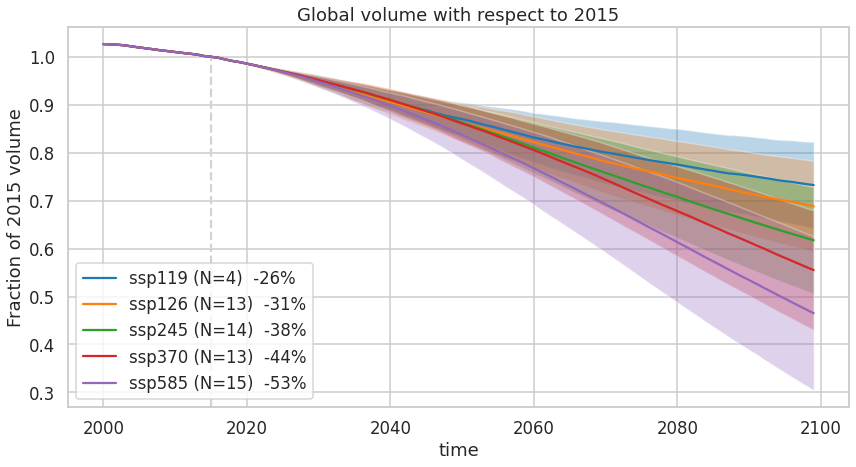

In [100]:
sns.set_context('talk')
global_out_frac =  global_out.divide(global_out.loc[2015])
plt.figure(figsize=(14, 7))
for ssp in ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:  # , 'ssp434', 'ssp460', 'ssp534-over'
    sel_c = [c for c in global_out.columns if ssp in c]
    avg = global_out_frac[sel_c].mean(axis=1).loc[:2100]
    std = global_out_frac[sel_c].std(axis=1).loc[:2100]
    
    print(ssp + ':', '{}%'.format(int((avg.loc[2099]-1)*100)))
    avg.loc[2100] = np.NaN
    avg.loc[2300] = np.NaN
    plt.fill_between(avg.index, avg-std, avg+std, alpha=0.3)
    avg.plot(label=ssp + ' (N={})'.format(len(sel_c)) + '  {}%'.format(int((avg.loc[2099]-1)*100)))
y0, y1 = plt.gca().get_ylim()
plt.vlines(2015, ymin=y0, ymax=1, color='lightgray', linestyles='--');
plt.ylabel('Fraction of 2015 volume')
plt.ylim([y0, y1])
plt.title('Global volume with respect to 2015')
plt.legend();

ssp119: -26%
ssp126: -31%
ssp245: -38%
ssp370: -44%
ssp534-over: -42%
ssp585: -53%


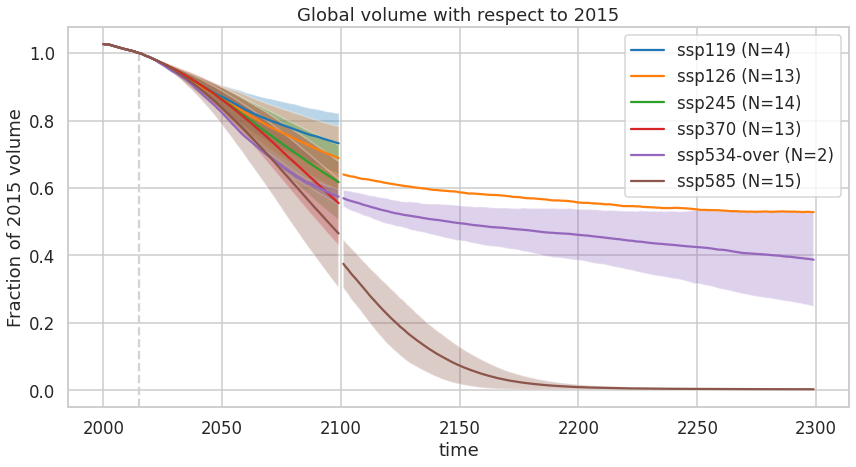

In [106]:
sns.set_context('talk')
global_out_frac =  global_out.divide(global_out.loc[2015])
plt.figure(figsize=(14, 7))
for ssp in ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp534-over', 'ssp585']:  # , 'ssp434', 'ssp460', 'ssp534-over'
    sel_c = [c for c in global_out.columns if ssp in c]
    avg = global_out_frac[sel_c].mean(axis=1)#.loc[:2100]
    std = global_out_frac[sel_c].std(axis=1)#.loc[:2100]
    
    print(ssp + ':', '{}%'.format(int((avg.loc[2099]-1)*100)))
    avg.loc[2100] = np.NaN
    avg.loc[2300] = np.NaN
    plt.fill_between(avg.index, avg-std, avg+std, alpha=0.3)
    avg.plot(label=ssp + ' (N={})'.format(len(sel_c)))# + '  {}%'.format(int((avg.loc[2099]-1)*100)))
y0, y1 = plt.gca().get_ylim()
plt.vlines(2015, ymin=y0, ymax=1, color='lightgray', linestyles='--');
plt.ylabel('Fraction of 2015 volume')
plt.ylim([y0, y1])
plt.title('Global volume with respect to 2015')
plt.legend();

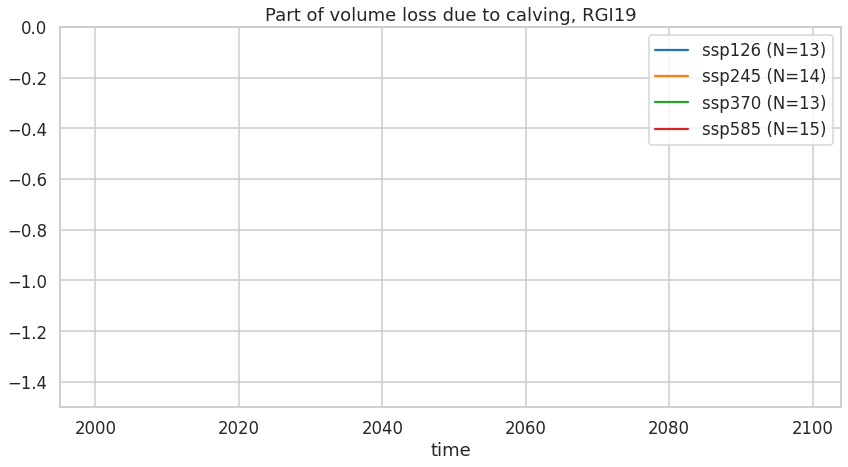

In [113]:
plt.figure(figsize=(14, 7))
rgi_reg = '19'
for ssp in ['ssp126', 'ssp245', 'ssp370', 'ssp585']:
    calv = pd.read_csv('/home/users/fmaussion/run_scripts/run_cmip6/agg_for_ipcc/abs_output/{}/{}.csv'.format(rgi_reg, ssp), index_col=0)
    avg = calv.mean(axis=1).loc[:2100]
    std = calv.std(axis=1).loc[:2100]
    
    avg.loc[2100] = np.NaN
    avg.loc[2300] = np.NaN
    plt.fill_between(avg.index, avg-std, avg+std, alpha=0.3)
    avg.plot(label=ssp + ' (N={})'.format(len(calv.columns)));
plt.title('Part of volume loss due to calving, RGI'+rgi_reg)
plt.ylim(-1.5, 0)
plt.legend();

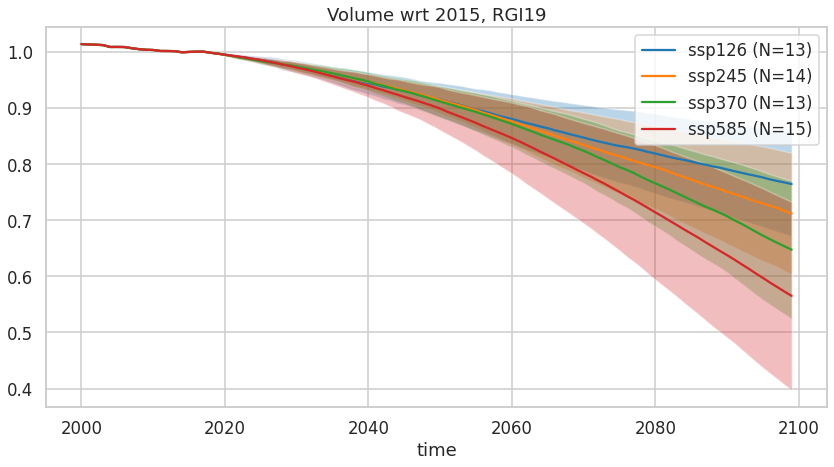

In [114]:
plt.figure(figsize=(14, 7))
for ssp in ['ssp126', 'ssp245', 'ssp370', 'ssp585']:
    frac = pd.read_csv('/home/users/fmaussion/run_scripts/run_cmip6/agg_for_ipcc/frac_output/{}/{}.csv'.format(rgi_reg, ssp), index_col=0)
    avg = frac.mean(axis=1).loc[:2100]
    std = frac.std(axis=1).loc[:2100]
    
    avg.loc[2100] = np.NaN
    avg.loc[2300] = np.NaN
    plt.fill_between(avg.index, avg-std, avg+std, alpha=0.3)
    avg.plot(label=ssp + ' (N={})'.format(len(frac.columns)));
plt.title('Volume wrt 2015, RGI' + rgi_reg)
plt.legend();

### Write frac bsl

In [75]:
tot_vol = pd.DataFrame()
tot_vol_bsl = pd.DataFrame()
for rgi_reg in range(1, 20):
    rgi_reg = '{:02d}'.format(rgi_reg)
    print(rgi_reg, flush=True)
    odir_frac = './agg_for_ipcc/frac_bsl_output/' + rgi_reg + '/'
    odir_abs_bsl = './agg_for_ipcc/abs_bsl_output/' + rgi_reg + '/'
    utils.mkdir(odir_frac, reset=True)
    utils.mkdir(odir_abs_bsl, reset=True)
    for ssp in out_all_ncs[rgi_reg].keys():
        odf_frac = pd.DataFrame()
        odf_bsl = pd.DataFrame()
        for gcm, nc in out_all_ncs[rgi_reg][ssp].items():
            frac_bsl = (nc.volume_bsl / nc.volume).to_series()
            if len(frac_bsl) > len(odf_frac):
                odf_frac = odf_frac.reindex(frac_bsl.index)  
                odf_bsl = odf_bsl.reindex(frac_bsl.index)  
            if len(frac_bsl) > len(tot_vol):
                tot_vol = tot_vol.reindex(frac_bsl.index)  
                tot_vol_bsl = tot_vol_bsl.reindex(frac_bsl.index)  
            odf_frac[gcm] = frac_bsl
            odf_bsl[gcm] = nc.volume_bsl.to_series()
            
            key_both = ssp + '_' + gcm
            
            if key_both not in tot_vol:
                tot_vol[key_both] = nc.volume.to_series()
                tot_vol_bsl[key_both] = nc.volume_bsl.to_series()
            else:
                tot_vol[key_both] += nc.volume.to_series()
                tot_vol_bsl[key_both] += nc.volume_bsl.to_series()
            
        odf_frac.to_csv(odir_frac + ssp + '.csv')
        odf_bsl.to_csv(odir_abs_bsl + ssp + '.csv')
tot_vol_bsl.to_csv('./agg_for_ipcc/abs_bsl_output/global.csv')
tot_vol_frac = tot_vol_bsl / tot_vol
tot_vol_frac.to_csv('./agg_for_ipcc/frac_bsl_output/global.csv')

01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19


In [84]:
tot_vol.loc[2000].max() / (158*1e12), tot_vol.loc[2015].max() / (158*1e12)

(0.9889391558448608, 0.9633970125188861)

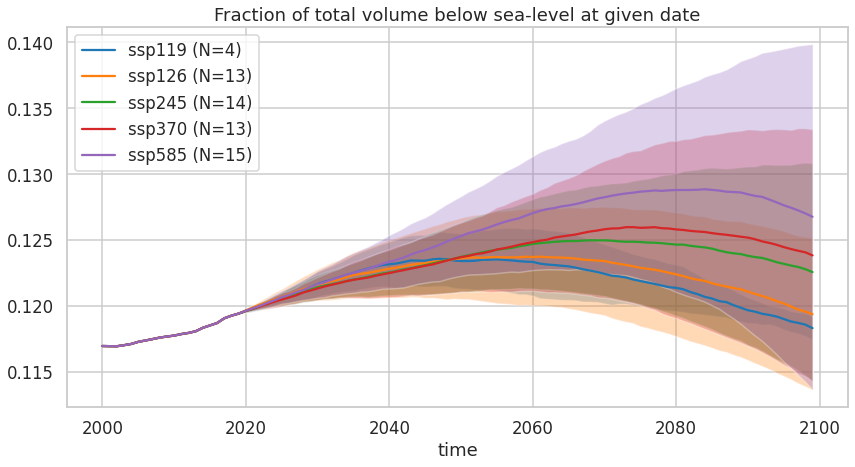

In [104]:
plt.figure(figsize=(14, 7))
frac_vol = tot_vol_frac
for ssp in ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:
    sel_c = [c for c in frac_vol.columns if ssp in c]
    
    avg = frac_vol[sel_c].mean(axis=1).loc[:2100]
    std = frac_vol[sel_c].std(axis=1).loc[:2100]
    
    avg.loc[2100] = np.NaN
    avg.loc[2300] = np.NaN
    plt.fill_between(avg.index, avg-std, avg+std, alpha=0.3)
    avg.plot(label=ssp + ' (N={})'.format(len(sel_c)));
plt.title('Fraction of total volume below sea-level at given date')
plt.legend(loc='upper left');